In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('student-scores.csv')
df.sample(5)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
1928,1929,Catherine,Brooks,catherine.brooks.1929@gslingacademy.com,female,True,6,True,33,Software Engineer,94,90,79,69,100,72,98
1689,1690,Robert,Mccall,robert.mccall.1690@gslingacademy.com,male,False,4,False,32,Accountant,87,100,60,99,45,73,86
966,967,Beth,Bonilla,beth.bonilla.967@gslingacademy.com,female,False,2,False,26,Unknown,64,65,97,96,80,80,78
334,335,Brandon,Smith,brandon.smith.335@gslingacademy.com,male,True,9,False,0,Business Owner,66,99,50,62,97,60,84
1471,1472,Christine,Hernandez,christine.hernandez.1472@gslingacademy.com,female,False,0,False,10,Real Estate Developer,82,86,91,68,80,62,81


weekly_self_study_hours - Independent feature

In [3]:
df.shape

(2000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [5]:
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [6]:
df.corr()

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,1.000000,0.012869,-0.017788,-0.003121,0.008524,-0.014042,0.021959,-0.002003,0.004726,0.045437,-0.001908,-0.005969
part_time_job,0.012869,1.000000,0.206361,-0.008382,-0.213963,-0.185573,-0.110774,-0.123929,-0.089219,-0.004072,-0.098809,-0.030352
absence_days,-0.017788,0.206361,1.000000,0.029019,-0.286086,-0.237072,-0.128159,-0.136419,-0.084029,-0.090554,-0.084861,-0.002942
extracurricular_activities,-0.003121,-0.008382,0.029019,1.000000,-0.052515,-0.052968,0.012526,-0.009333,-0.003007,-0.010062,-0.003428,-0.040877
weekly_self_study_hours,0.008524,-0.213963,-0.286086,-0.052515,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622
math_score,-0.014042,-0.185573,-0.237072,-0.052968,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,0.021959,-0.110774,-0.128159,0.012526,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,-0.002003,-0.123929,-0.136419,-0.009333,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,0.004726,-0.089219,-0.084029,-0.003007,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,0.045437,-0.004072,-0.090554,-0.010062,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526


In [7]:
# check that there are any duplicate rows or not
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [9]:
#find the columns name having neumerical values
neumerical_features=[]
for columns in df.columns:
    if df[columns].dtype!='O':
        neumerical_features.append(columns)
neumerical_features

['id',
 'part_time_job',
 'absence_days',
 'extracurricular_activities',
 'weekly_self_study_hours',
 'math_score',
 'history_score',
 'physics_score',
 'chemistry_score',
 'biology_score',
 'english_score',
 'geography_score']

## EDA and Feature Engineering

<Axes: >

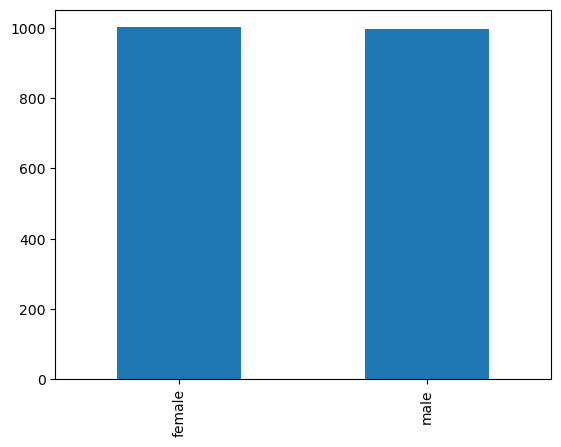

In [10]:
# Countplot on catagorical features

df['gender'].value_counts().plot(kind='bar')

Almost same number of boys and girls student are there 

<Axes: >

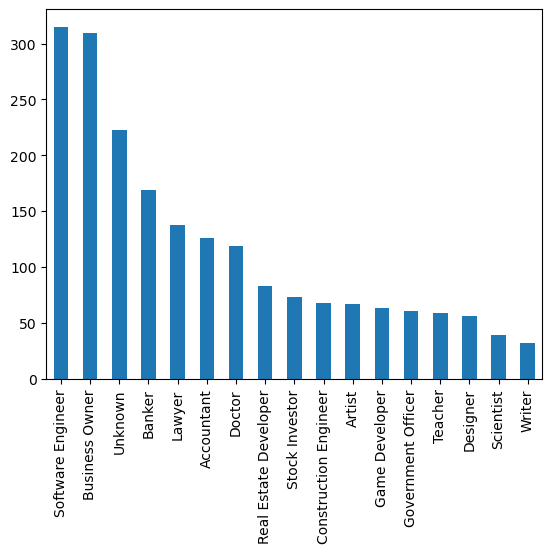

In [11]:
df['career_aspiration'].value_counts().plot(kind='bar')

<Axes: >

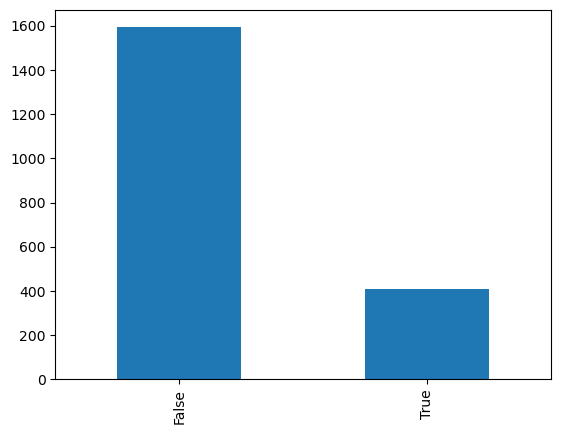

In [12]:
df['extracurricular_activities'].value_counts().plot(kind='bar')

<Axes: >

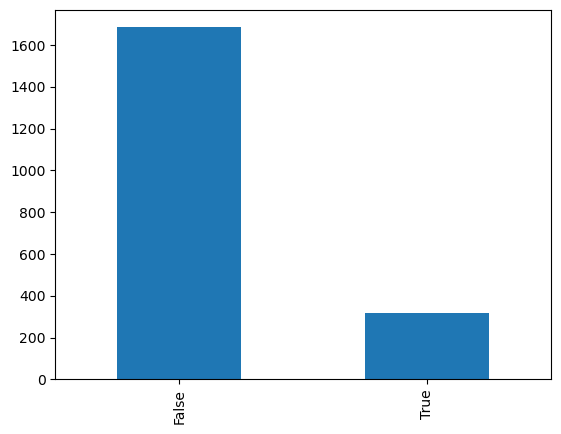

In [13]:
df['part_time_job'].value_counts().plot(kind='bar')

<Axes: >

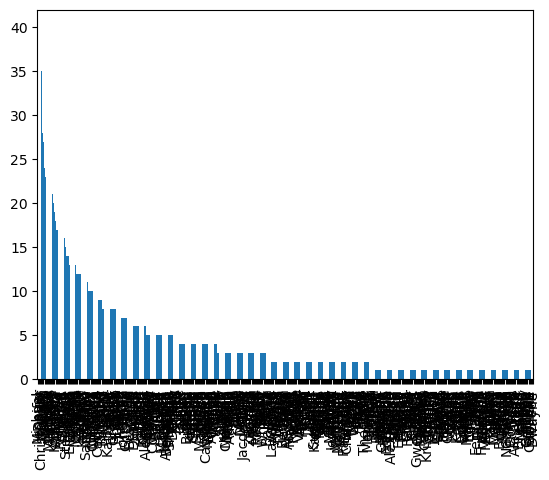

In [14]:
df['first_name'].value_counts().plot(kind='bar')

<Axes: >

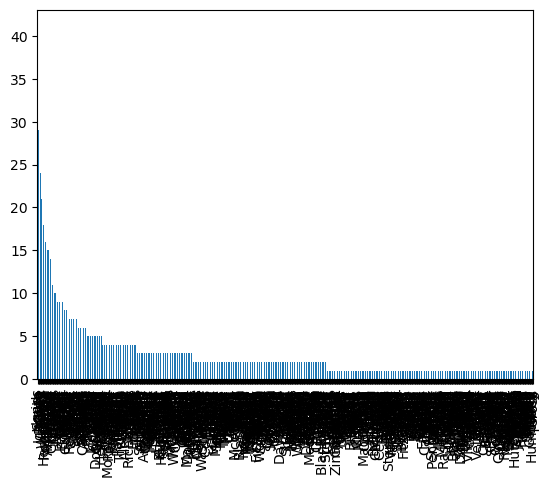

In [15]:
df['last_name'].value_counts().plot(kind='bar')

From Univeriant eda we can analise that the first name, last name and email id are almost unique for everyone so that will not help to predict the target feature 

In [16]:
new_df=df.iloc[:,1:4]
df=df.drop(columns='first_name',axis=0)
df=df.drop(columns='last_name',axis=0)
df=df.drop(columns='email',axis=0)
df.head()

,id,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [17]:
new_df.head()

,first_name,last_name,email
0,Paul,Casey,paul.casey.1@gslingacademy.com
1,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com
2,Tina,Andrews,tina.andrews.3@gslingacademy.com
3,Tara,Clark,tara.clark.4@gslingacademy.com
4,Anthony,Campos,anthony.campos.5@gslingacademy.com


<Axes: ylabel='gender'>

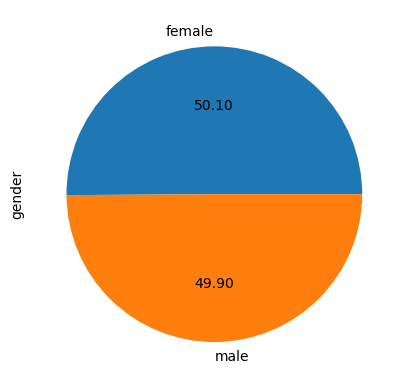

In [18]:
# Piechart on Catagorical feature

df['gender'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='career_aspiration'>

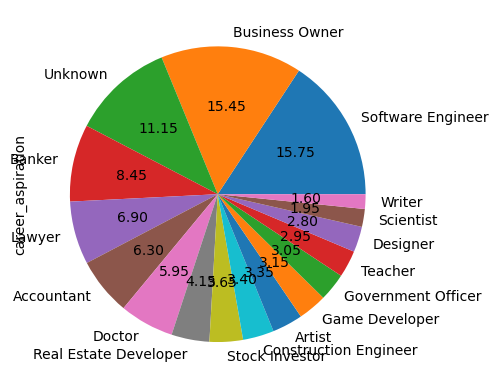

In [19]:
df['career_aspiration'].value_counts().plot(kind='pie',autopct='%.2f')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'absence_days'}>,
        <Axes: title={'center': 'weekly_self_study_hours'}>],
       [<Axes: title={'center': 'math_score'}>,
        <Axes: title={'center': 'history_score'}>,
        <Axes: title={'center': 'physics_score'}>],
       [<Axes: title={'center': 'chemistry_score'}>,
        <Axes: title={'center': 'biology_score'}>,
        <Axes: title={'center': 'english_score'}>],
       [<Axes: title={'center': 'geography_score'}>, <Axes: >, <Axes: >]],
      dtype=object)

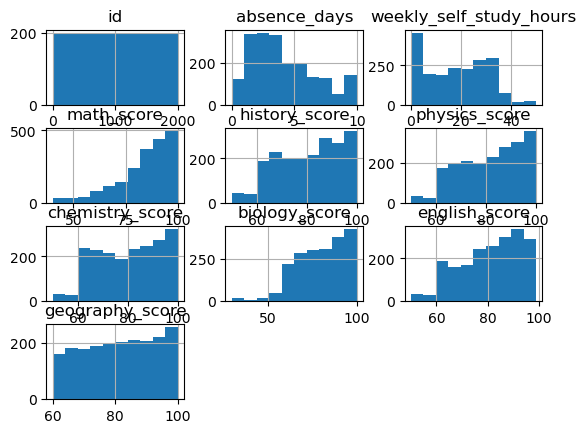

In [20]:
# Histogram on neumerical data

df.hist()

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\2470580356.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['absence_days'])


<Axes: xlabel='absence_days', ylabel='Density'>

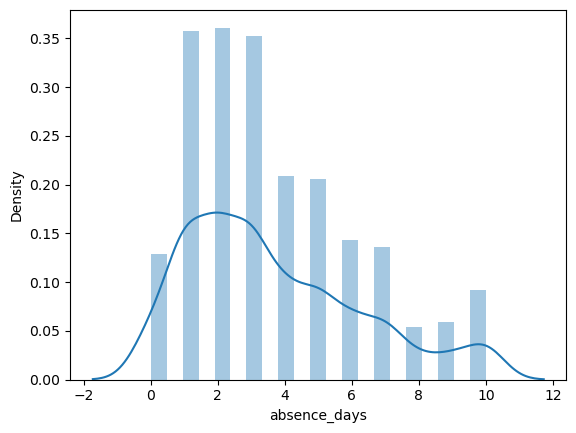

In [21]:
# Distribution Plot on neumerical features

sns.distplot(df['absence_days'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\4050950771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['absence_days'])


<Axes: xlabel='absence_days', ylabel='Density'>

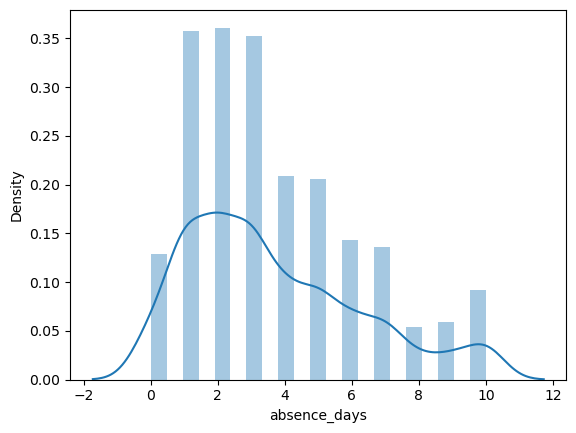

In [22]:
sns.distplot(df['absence_days'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\1031510972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weekly_self_study_hours'])


<Axes: xlabel='weekly_self_study_hours', ylabel='Density'>

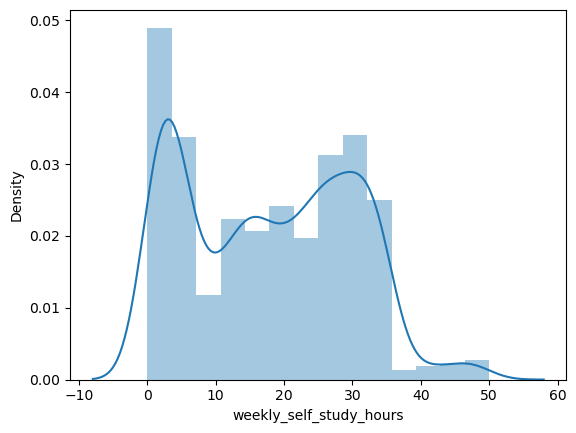

In [23]:
sns.distplot(df['weekly_self_study_hours'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\3473595877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math_score'])


<Axes: xlabel='math_score', ylabel='Density'>

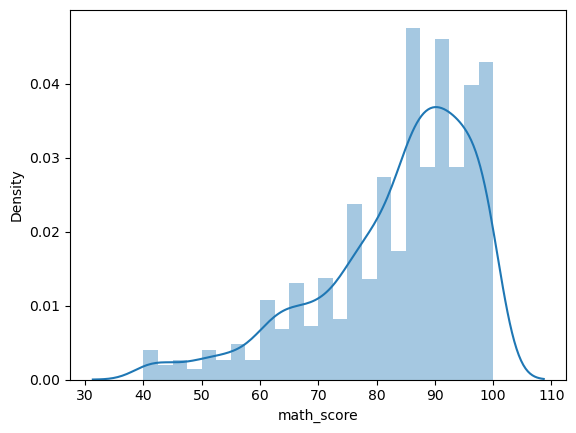

In [24]:
sns.distplot(df['math_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\2942863999.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['history_score'])


<Axes: xlabel='history_score', ylabel='Density'>

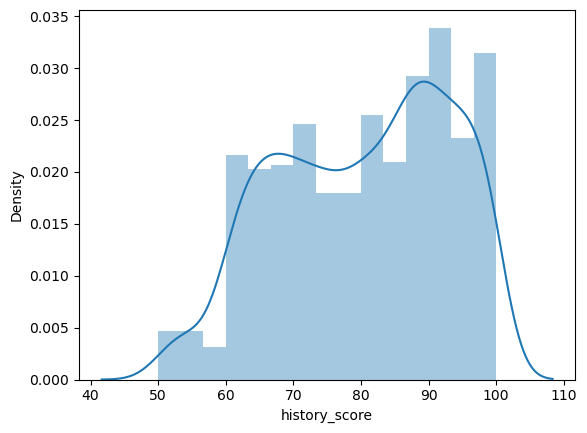

In [25]:
sns.distplot(df['history_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\2484679862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['physics_score'])


<Axes: xlabel='physics_score', ylabel='Density'>

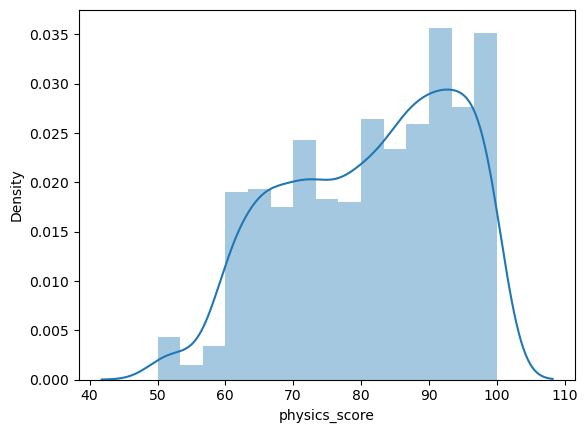

In [26]:
sns.distplot(df['physics_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\2640967710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chemistry_score'])


<Axes: xlabel='chemistry_score', ylabel='Density'>

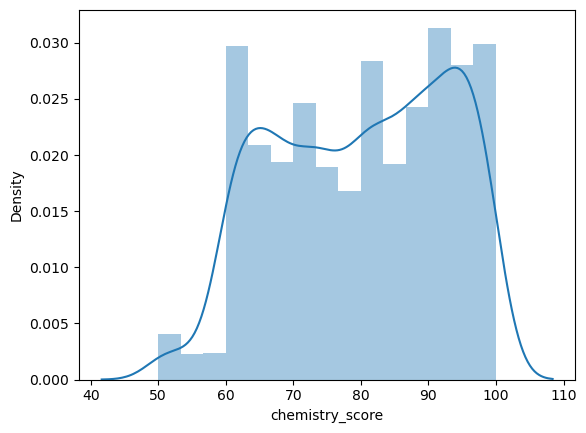

In [27]:
sns.distplot(df['chemistry_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\1942069105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['biology_score'])


<Axes: xlabel='biology_score', ylabel='Density'>

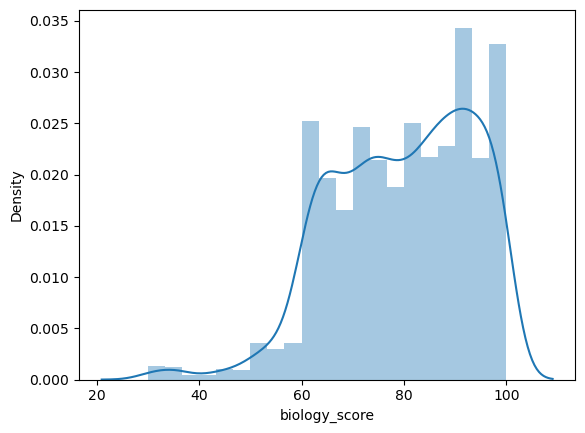

In [28]:
sns.distplot(df['biology_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\233019574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['geography_score'])


<Axes: xlabel='geography_score', ylabel='Density'>

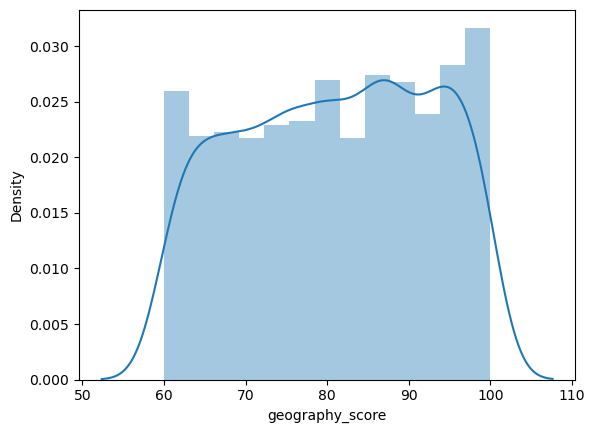

In [29]:
sns.distplot(df['geography_score'])

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\359745389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['english_score'])


<Axes: xlabel='english_score', ylabel='Density'>

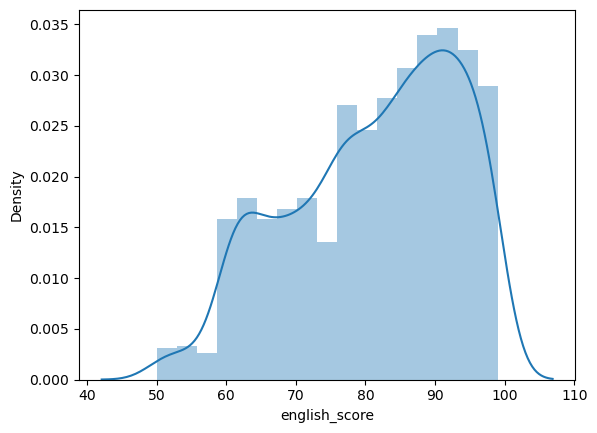

In [30]:
sns.distplot(df['english_score'])

Only geography_score feature is normally distributed all others are skewly distributed either left or right skew 

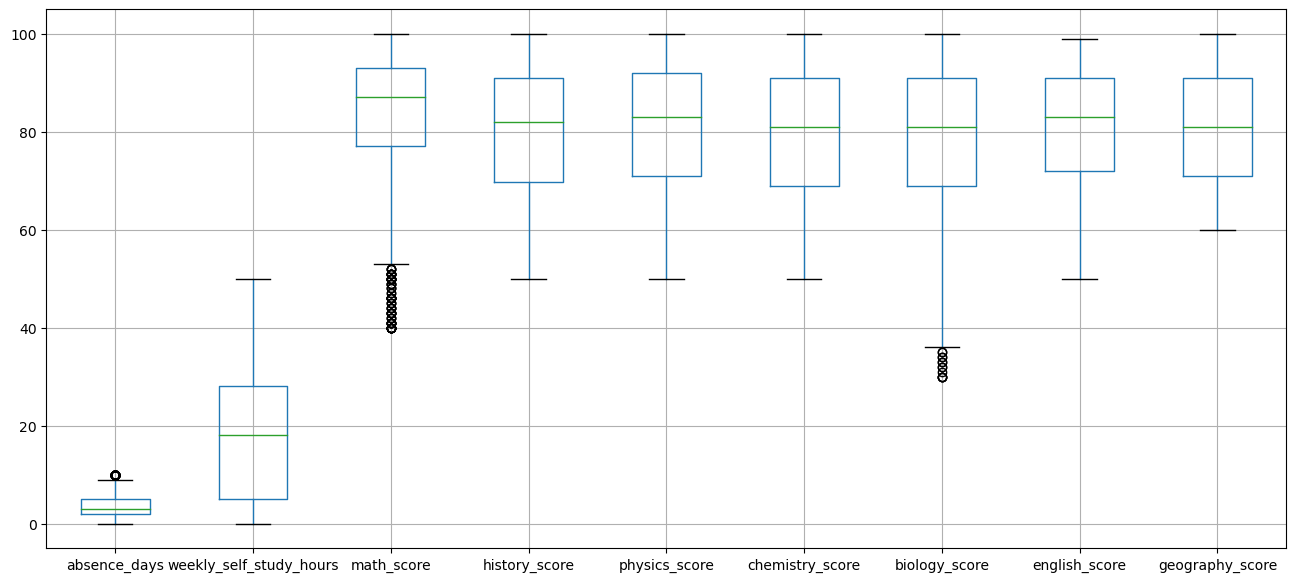

In [31]:
# box plot on neumerical features 

plt.figure(figsize=(16,7))
df[['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score', 'physics_score','chemistry_score', 'biology_score', 'english_score', 'geography_score']].boxplot()
plt.show()

absent_days,math_score,biology score are the only features having outliers

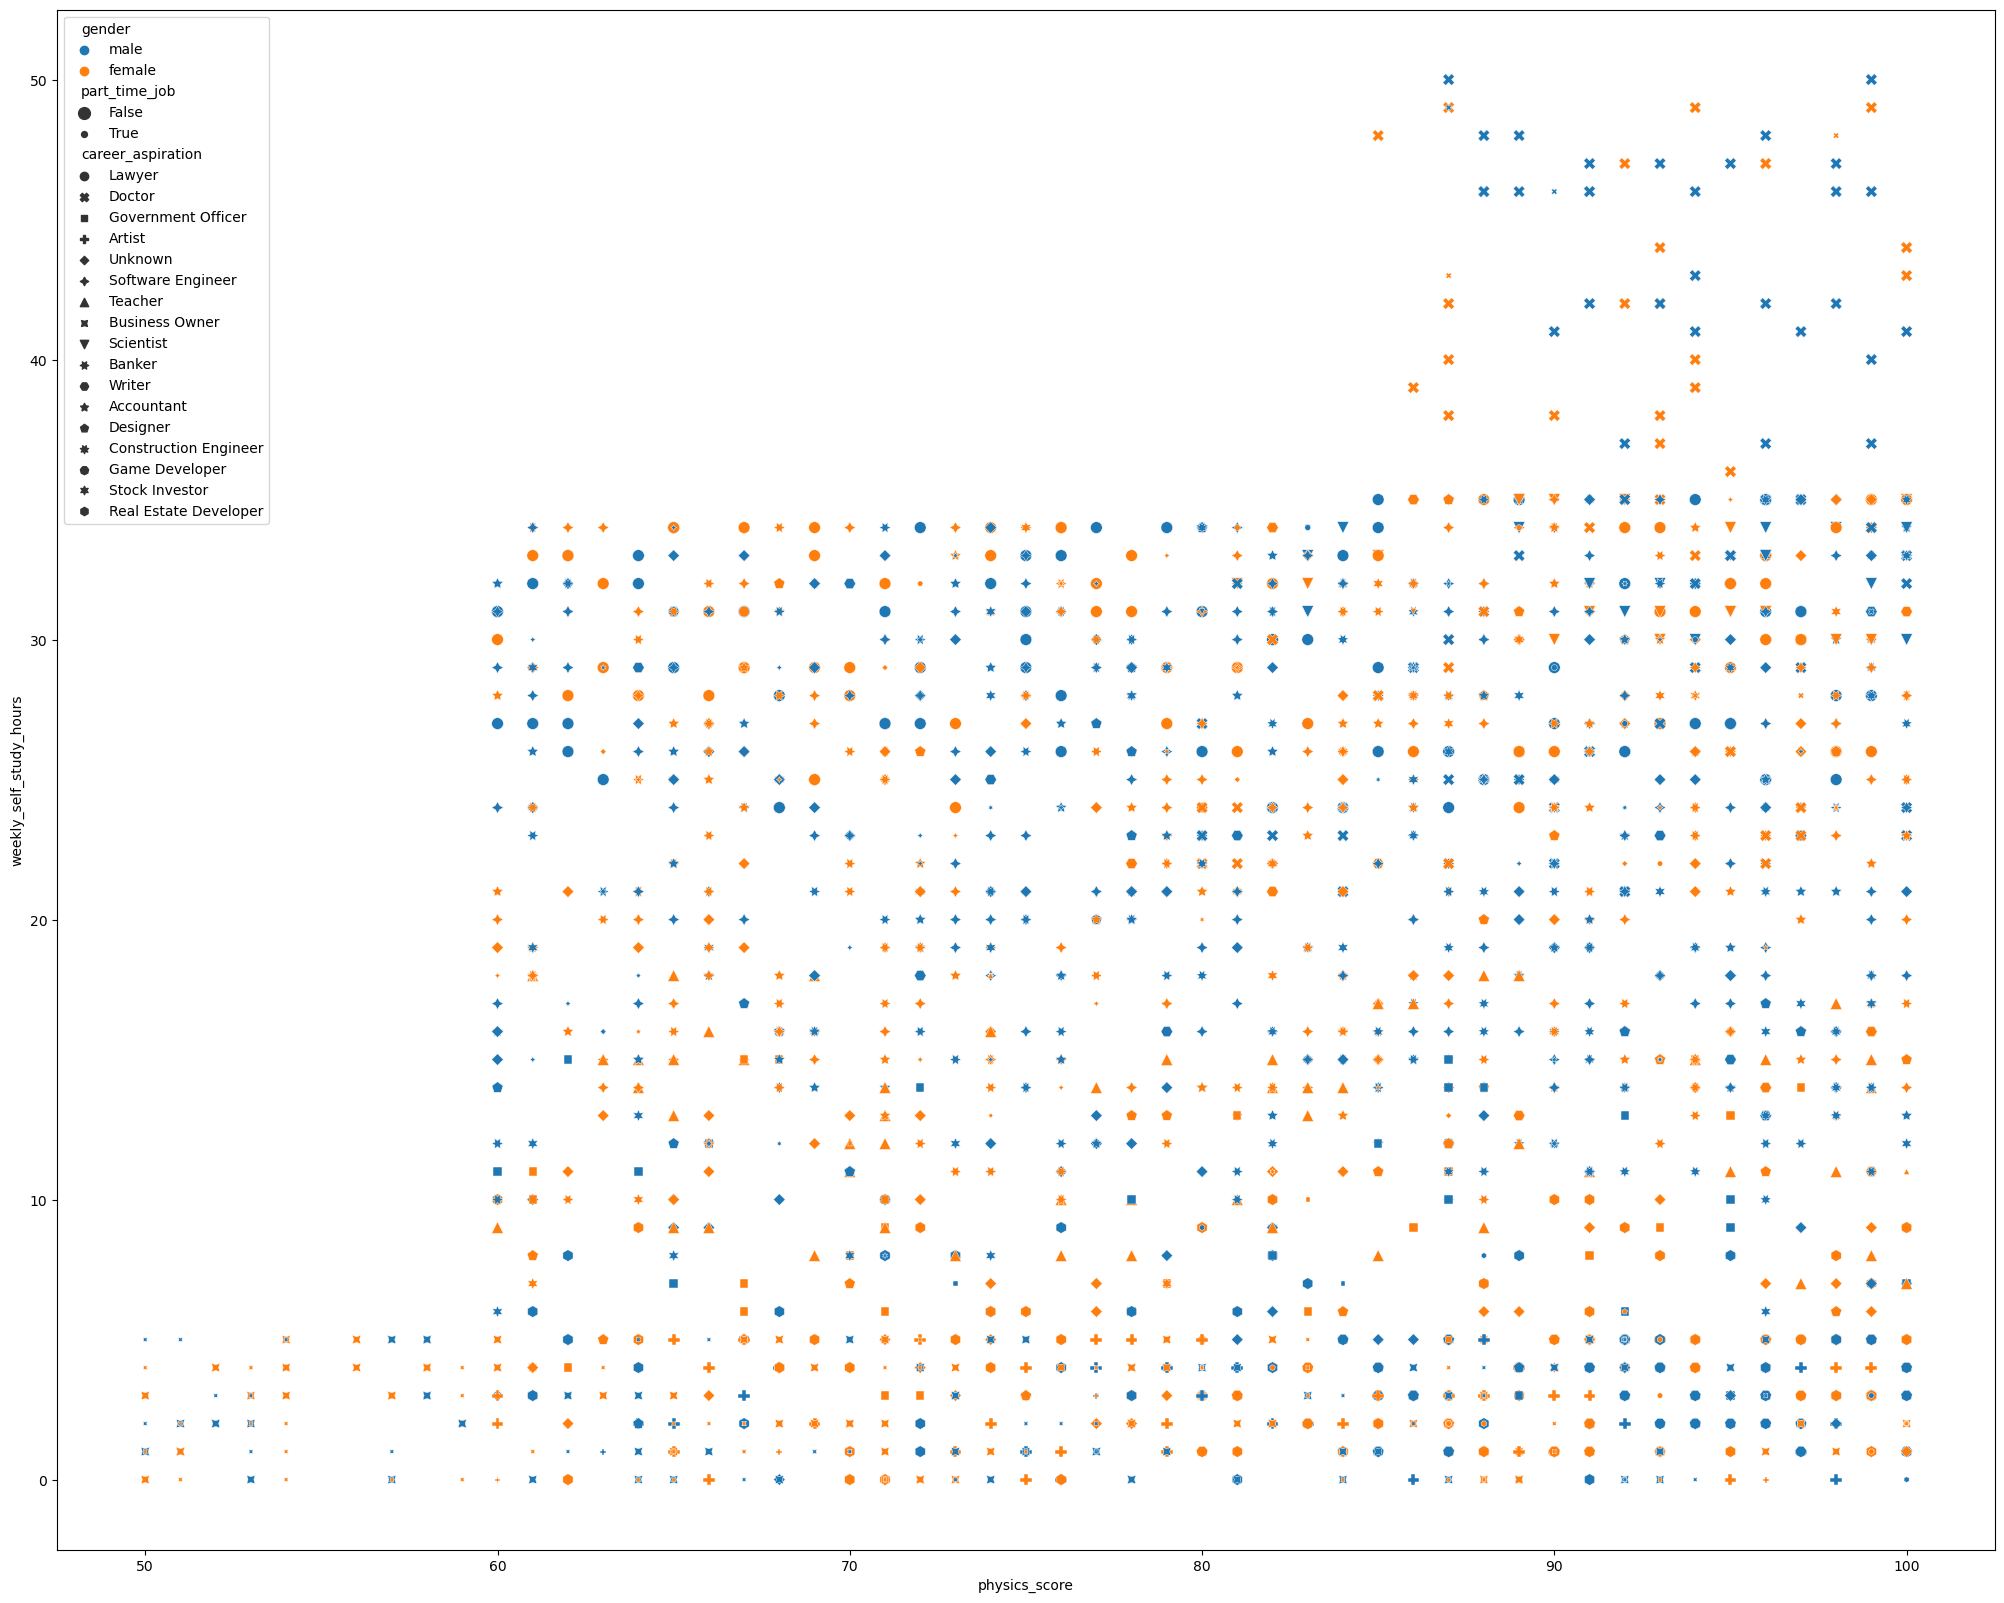

In [32]:
# the scatter plot between all neumerical features
plt.figure(figsize=(25,20))
sns.scatterplot(data=df, x="physics_score", y="weekly_self_study_hours", hue="gender", style="career_aspiration", size="part_time_job")
plt.show()

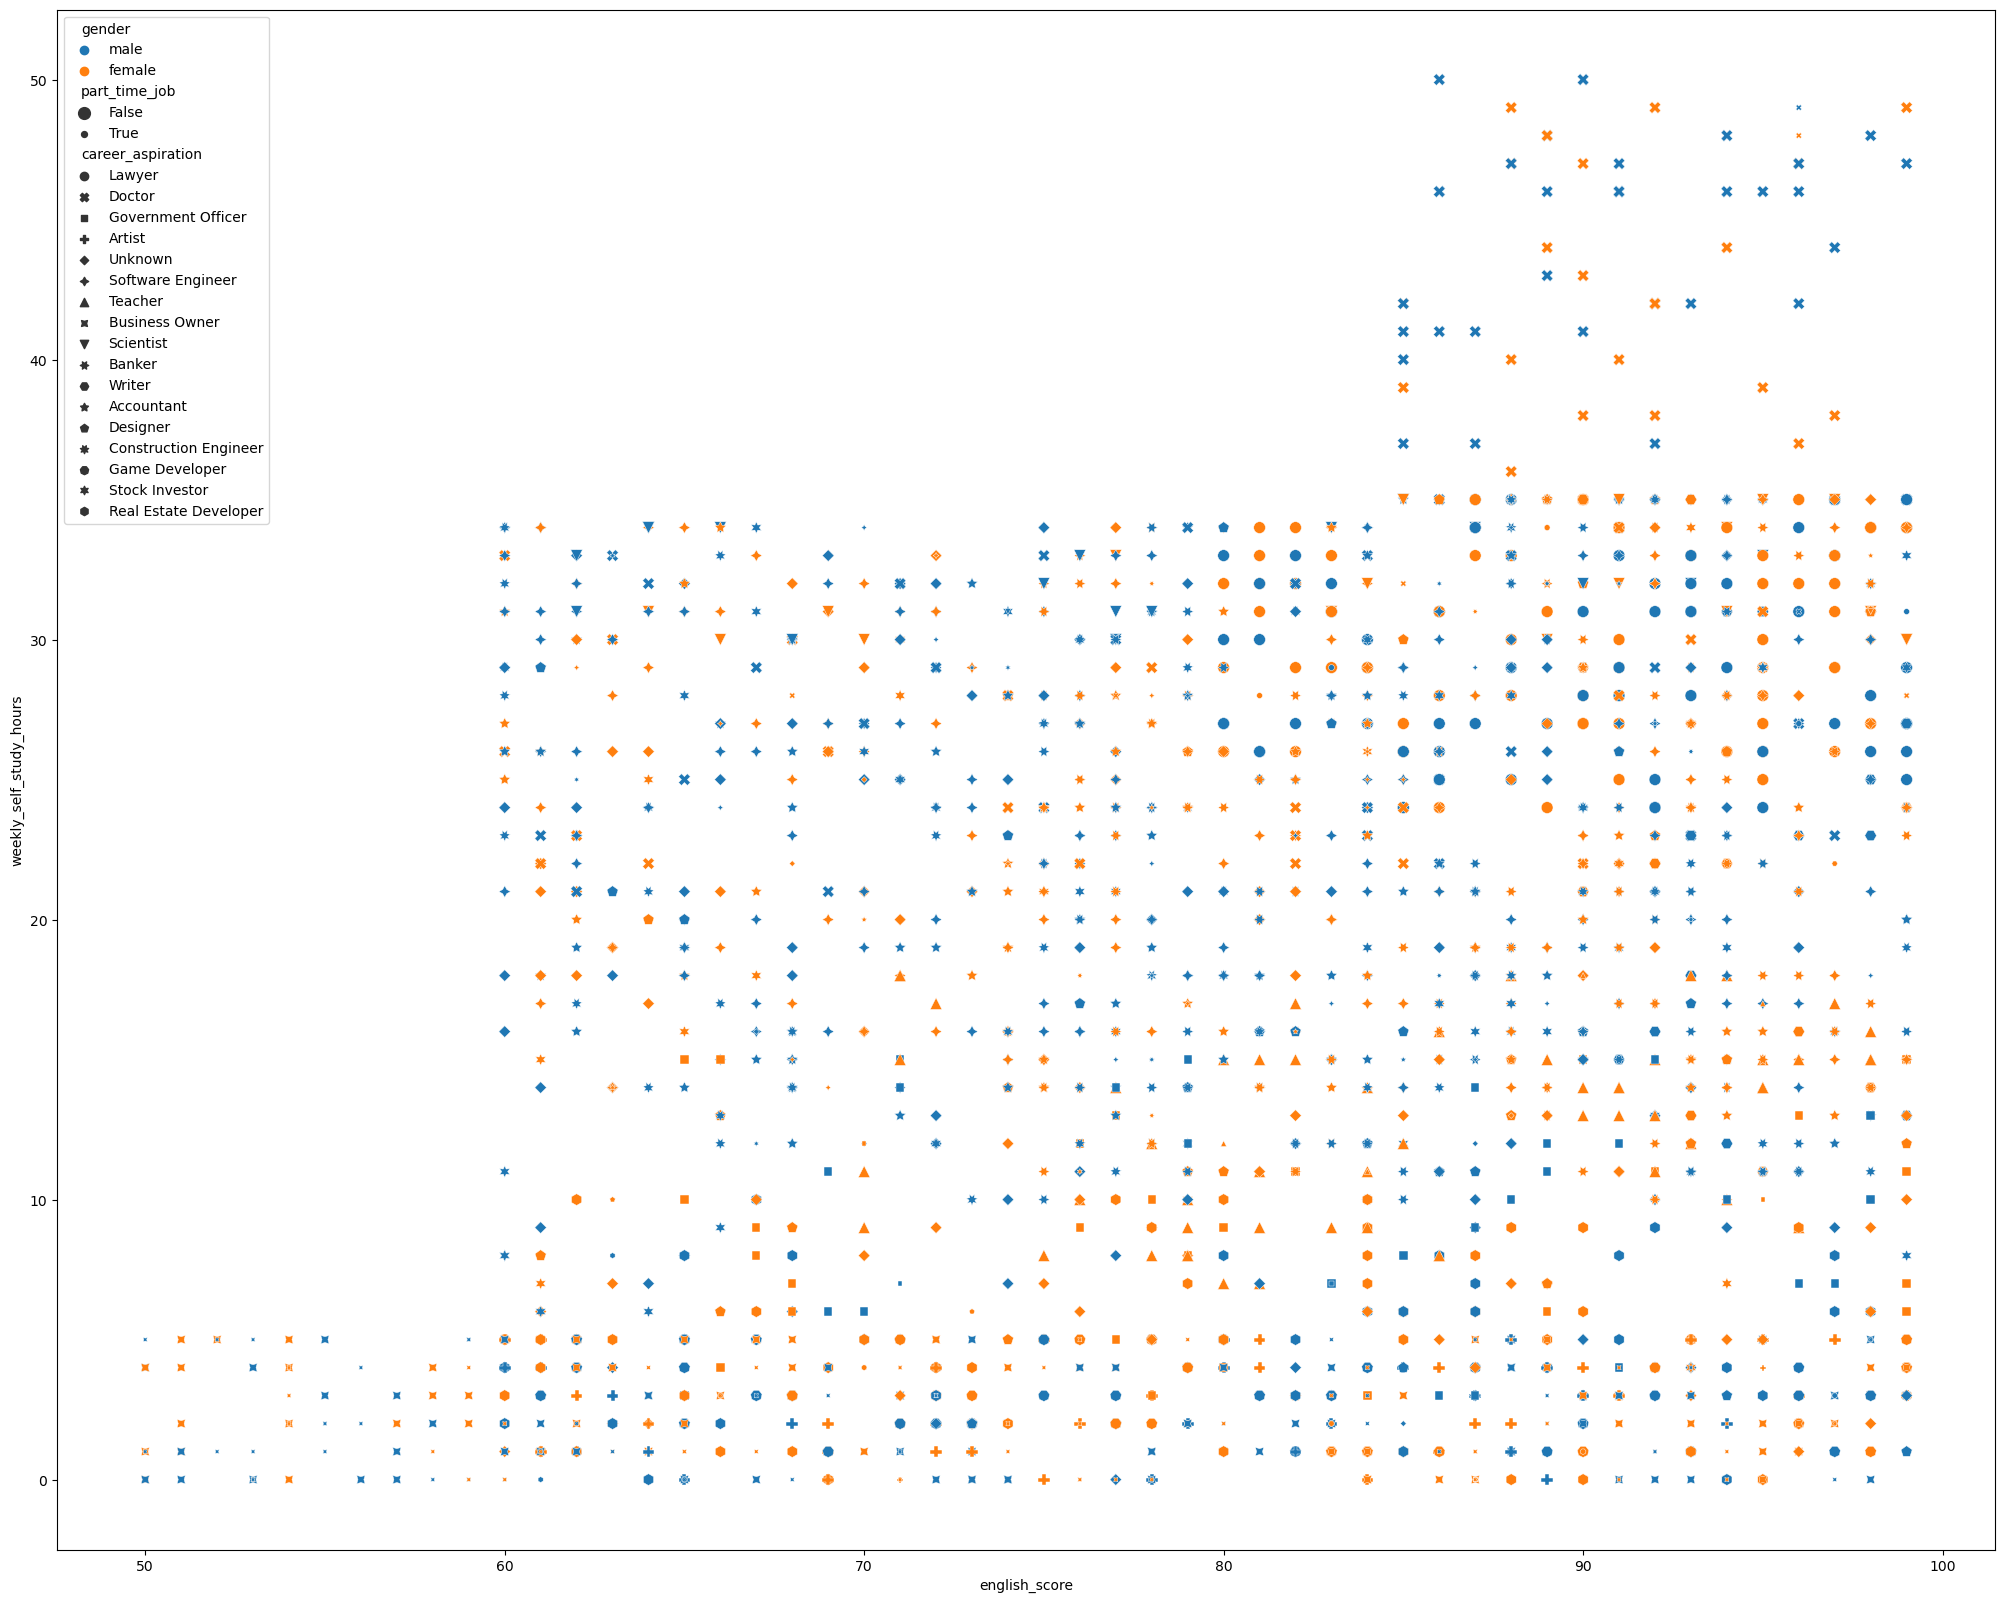

In [33]:
plt.figure(figsize=(25,20))
sns.scatterplot(data=df, x="english_score", y="weekly_self_study_hours", hue="gender", style="career_aspiration", size="part_time_job")
plt.show()

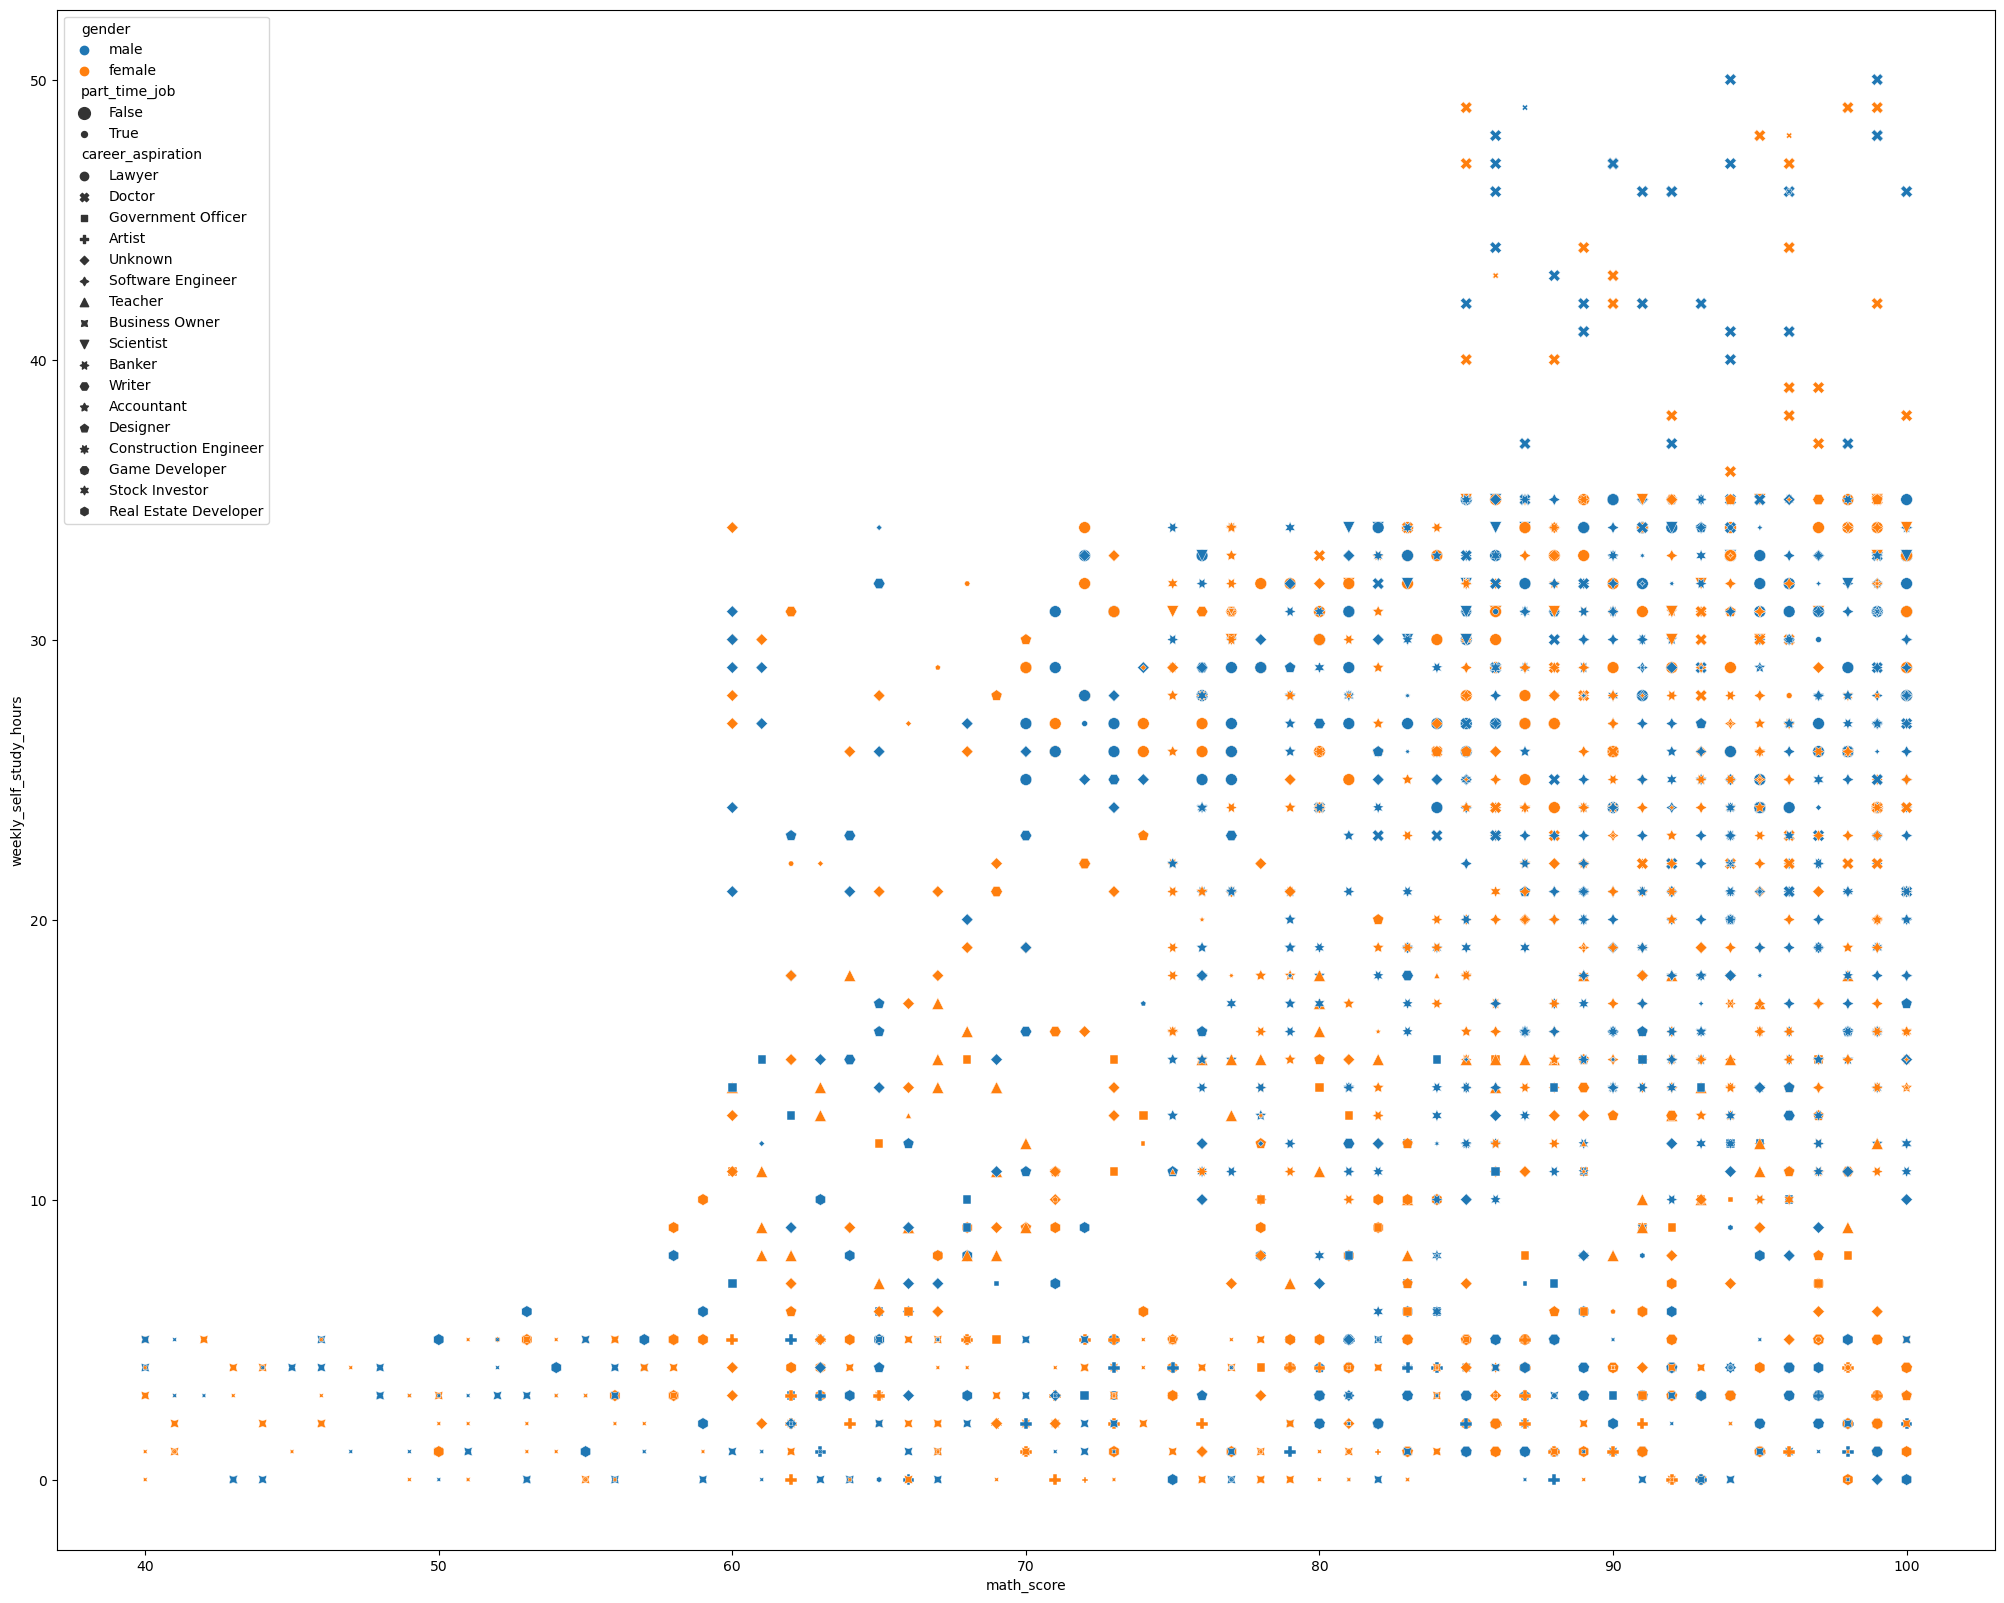

In [34]:
plt.figure(figsize=(25,20))
sns.scatterplot(data=df, x="math_score", y="weekly_self_study_hours", hue="gender", style="career_aspiration", size="part_time_job")
plt.show()

Distribution of different subject score is distributed with weekly self study hour by a specific pattern

A student with less weekly hour study can get less or more marks of a subject but a student with more hour of study cannot get less marks in a particular subject 

In [35]:
# correlation between different neumerical features
correlation=df.corr()
correlation

C:\Users\monda\AppData\Local\Temp\ipykernel_15032\581957831.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,id,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,1.000000,0.012869,-0.017788,-0.003121,0.008524,-0.014042,0.021959,-0.002003,0.004726,0.045437,-0.001908,-0.005969
part_time_job,0.012869,1.000000,0.206361,-0.008382,-0.213963,-0.185573,-0.110774,-0.123929,-0.089219,-0.004072,-0.098809,-0.030352
absence_days,-0.017788,0.206361,1.000000,0.029019,-0.286086,-0.237072,-0.128159,-0.136419,-0.084029,-0.090554,-0.084861,-0.002942
extracurricular_activities,-0.003121,-0.008382,0.029019,1.000000,-0.052515,-0.052968,0.012526,-0.009333,-0.003007,-0.010062,-0.003428,-0.040877
weekly_self_study_hours,0.008524,-0.213963,-0.286086,-0.052515,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622
math_score,-0.014042,-0.185573,-0.237072,-0.052968,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,0.021959,-0.110774,-0.128159,0.012526,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,-0.002003,-0.123929,-0.136419,-0.009333,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,0.004726,-0.089219,-0.084029,-0.003007,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,0.045437,-0.004072,-0.090554,-0.010062,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526


<Axes: >

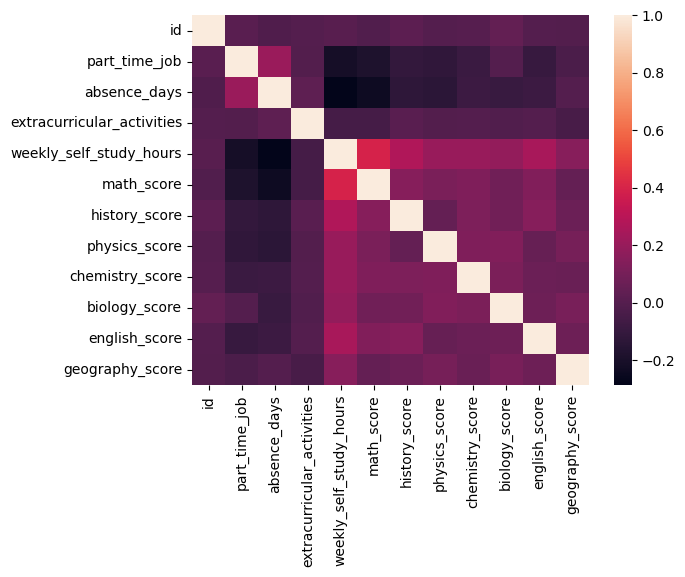

In [36]:
sns.heatmap(correlation)

In [37]:
# Handling missing value
df.isnull().mean()*100

id                            0.0
gender                        0.0
part_time_job                 0.0
absence_days                  0.0
extracurricular_activities    0.0
weekly_self_study_hours       0.0
career_aspiration             0.0
math_score                    0.0
history_score                 0.0
physics_score                 0.0
chemistry_score               0.0
biology_score                 0.0
english_score                 0.0
geography_score               0.0
dtype: float64

No missing Value

In [38]:
# ordinal Encoding on features with ordinal data(gender,part_time_job ,extracurricular_activities)
df['gender'].value_counts()

female    1002
male       998
Name: gender, dtype: int64

In [39]:
df1=df.iloc[:,1:2]
df1

,gender
0,male
1,female
2,female
3,female
4,male
...,...
1995,male
1996,male
1997,female
1998,female


In [40]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['male','female']])
encoded=oe.fit_transform(df1)
df1=pd.DataFrame(encoded,columns=["gender"])
df1.head()

,gender
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [41]:
df=df.drop(columns='gender',axis=0)
df=pd.concat([df,df1],axis=1)
df.sample(5)

,id,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,gender
1916,1917,False,1,True,22,Writer,72,100,78,100,98,92,97,1.0
429,430,False,5,False,33,Scientist,94,99,83,94,93,95,93,0.0
1081,1082,False,3,False,6,Unknown,65,72,77,89,74,76,61,1.0
959,960,False,2,False,24,Banker,90,98,89,78,74,93,65,1.0
816,817,False,7,False,15,Accountant,88,67,71,85,68,88,67,1.0


In [42]:
# one encoding  data feature (career_aspiration)
df['career_aspiration'].value_counts()

Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: career_aspiration, dtype: int64

In [43]:
df=pd.get_dummies(df,columns=['career_aspiration'],drop_first=True)
df

,id,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,...,career_aspiration_Game Developer,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer
0,1,False,3,False,27,73,81,93,97,63,...,0,0,1,0,0,0,0,0,0,0
1,2,False,2,False,47,90,86,96,100,90,...,0,0,0,0,0,0,0,0,0,0
2,3,False,9,True,13,81,97,95,96,65,...,0,1,0,0,0,0,0,0,0,0
3,4,False,5,False,3,71,74,88,80,89,...,0,0,0,0,0,0,0,0,0,0
4,5,False,5,False,10,84,77,65,65,80,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,False,2,False,30,83,77,84,73,75,...,0,0,0,0,0,0,0,0,0,0
1996,1997,False,2,False,20,89,65,73,80,87,...,0,0,0,0,0,1,0,0,0,0
1997,1998,False,5,False,14,97,85,63,93,68,...,0,0,0,0,0,1,0,0,0,0
1998,1999,True,10,True,5,51,96,72,89,95,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Mathematical Transformation
df.skew()

id                                         0.000000
part_time_job                              1.876711
absence_days                               0.767021
extracurricular_activities                 1.470199
weekly_self_study_hours                    0.138065
math_score                                -1.090145
history_score                             -0.269966
physics_score                             -0.346301
chemistry_score                           -0.201933
biology_score                             -0.529917
english_score                             -0.456268
geography_score                           -0.097094
gender                                    -0.004003
career_aspiration_Artist                   5.189007
career_aspiration_Banker                   2.989988
career_aspiration_Business Owner           1.913299
career_aspiration_Construction Engineer    5.146522
career_aspiration_Designer                 5.726454
career_aspiration_Doctor                   3.727039
career_aspir

In [45]:
# deperate dependent and independent Feature 
df2=df['weekly_self_study_hours']
df=df.drop(columns='weekly_self_study_hours',axis=0)
df.head()

,id,part_time_job,absence_days,extracurricular_activities,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,...,career_aspiration_Game Developer,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer
0,1,False,3,False,73,81,93,97,63,80,...,0,0,1,0,0,0,0,0,0,0
1,2,False,2,False,90,86,96,100,90,88,...,0,0,0,0,0,0,0,0,0,0
2,3,False,9,True,81,97,95,96,65,77,...,0,1,0,0,0,0,0,0,0,0
3,4,False,5,False,71,74,88,80,89,63,...,0,0,0,0,0,0,0,0,0,0
4,5,False,5,False,84,77,65,65,80,74,...,0,0,0,0,0,0,0,0,1,0


In [46]:
df.columns

Index(['id', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'math_score', 'history_score', 'physics_score', 'chemistry_score',
       'biology_score', 'english_score', 'geography_score', 'gender',
       'career_aspiration_Artist', 'career_aspiration_Banker',
       'career_aspiration_Business Owner',
       'career_aspiration_Construction Engineer', 'career_aspiration_Designer',
       'career_aspiration_Doctor', 'career_aspiration_Game Developer',
       'career_aspiration_Government Officer', 'career_aspiration_Lawyer',
       'career_aspiration_Real Estate Developer',
       'career_aspiration_Scientist', 'career_aspiration_Software Engineer',
       'career_aspiration_Stock Investor', 'career_aspiration_Teacher',
       'career_aspiration_Unknown', 'career_aspiration_Writer'],
      dtype='object')

In [47]:
# Box Cox Transformation
k=[]
k=df.columns

In [48]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
df= pt.fit_transform(df+0.0000001)
i=0
for columns in k:
    print(columns,"= ",pt.lambdas_[i])

id =  0.7084728096539286
part_time_job =  0.7084728096539286
absence_days =  0.7084728096539286
extracurricular_activities =  0.7084728096539286
math_score =  0.7084728096539286
history_score =  0.7084728096539286
physics_score =  0.7084728096539286
chemistry_score =  0.7084728096539286
biology_score =  0.7084728096539286
english_score =  0.7084728096539286
geography_score =  0.7084728096539286
gender =  0.7084728096539286
career_aspiration_Artist =  0.7084728096539286
career_aspiration_Banker =  0.7084728096539286
career_aspiration_Business Owner =  0.7084728096539286
career_aspiration_Construction Engineer =  0.7084728096539286
career_aspiration_Designer =  0.7084728096539286
career_aspiration_Doctor =  0.7084728096539286
career_aspiration_Game Developer =  0.7084728096539286
career_aspiration_Government Officer =  0.7084728096539286
career_aspiration_Lawyer =  0.7084728096539286
career_aspiration_Real Estate Developer =  0.7084728096539286
career_aspiration_Scientist =  0.7084728096

In [49]:
df

array([[-2.17876808, -0.43318409,  0.03684906, ..., -0.1743465 ,
        -0.35424907, -0.12751534],
       [-2.1678663 , -0.43318409, -0.35625361, ..., -0.1743465 ,
        -0.35424907, -0.12751534],
       [-2.15851707, -0.43318409,  1.47029357, ..., -0.1743465 ,
        -0.35424907, -0.12751534],
       ...,
       [ 1.55152189, -0.43318409,  0.62834403, ..., -0.1743465 ,
        -0.35424907, -0.12751534],
       [ 1.55285061,  2.30848737,  1.64247564, ..., -0.1743465 ,
        -0.35424907, -0.12751534],
       [ 1.55417915, -0.43318409,  0.62834403, ..., -0.1743465 ,
        -0.35424907, -0.12751534]])

In [50]:
df=pd.DataFrame(df,columns=['id', 'part_time_job', 'absence_days', 'extracurricular_activities',
       'math_score', 'history_score', 'physics_score', 'chemistry_score',
       'biology_score', 'english_score', 'geography_score', 'gender',
       'career_aspiration_Artist', 'career_aspiration_Banker',
       'career_aspiration_Business Owner',
       'career_aspiration_Construction Engineer', 'career_aspiration_Designer',
       'career_aspiration_Doctor', 'career_aspiration_Game Developer',
       'career_aspiration_Government Officer', 'career_aspiration_Lawyer',
       'career_aspiration_Real Estate Developer',
       'career_aspiration_Scientist', 'career_aspiration_Software Engineer',
       'career_aspiration_Stock Investor', 'career_aspiration_Teacher',
       'career_aspiration_Unknown', 'career_aspiration_Writer'])
df=pd.concat([df,df2],axis=1)
df.head()

,id,part_time_job,absence_days,extracurricular_activities,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,...,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer,weekly_self_study_hours
0,-2.178768,-0.433184,0.036849,-0.506242,-0.990934,-0.005118,0.942452,1.372053,-1.215804,-0.216412,...,-0.177368,3.673248,-0.208079,-0.141024,-0.43237,-0.194635,-0.174347,-0.354249,-0.127515,27
1,-2.167866,-0.433184,-0.356254,-0.506242,0.416152,0.405110,1.227617,1.634972,0.751283,0.507656,...,-0.177368,-0.272239,-0.208079,-0.141024,-0.43237,-0.194635,-0.174347,-0.354249,-0.127515,47
2,-2.158517,-0.433184,1.470294,1.975338,-0.421939,1.369293,1.131548,1.285302,-1.095287,-0.463149,...,5.637986,-0.272239,-0.208079,-0.141024,-0.43237,-0.194635,-0.174347,-0.354249,-0.127515,13
3,-2.150052,-0.433184,0.628344,-0.506242,-1.110413,-0.549253,0.487449,-0.040042,0.665242,-1.443584,...,-0.177368,-0.272239,-0.208079,-0.141024,-0.43237,-0.194635,-0.174347,-0.354249,-0.127515,3
4,-2.142189,-0.433184,0.628344,-0.506242,-0.167524,-0.320410,-1.279477,-1.168294,-0.063283,-0.696687,...,-0.177368,-0.272239,-0.208079,-0.141024,-0.43237,-0.194635,-0.174347,2.822873,-0.127515,10


In [51]:
# Outlier_management(absent_days,math_score,biology score features have outliers)
# all 3 features are skewly distributed so we need to use IRQ Method

#outlier management
for columns in neumerical_features:
    Q3=df[columns].quantile(0.75)
    Q1=df[columns].quantile(0.25)
    IQR=Q3-Q1
    Upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    df.loc[df[columns]>=Upper_bound,columns]=Upper_bound
    df.loc[df[columns]<=lower_bound,columns]=lower_bound

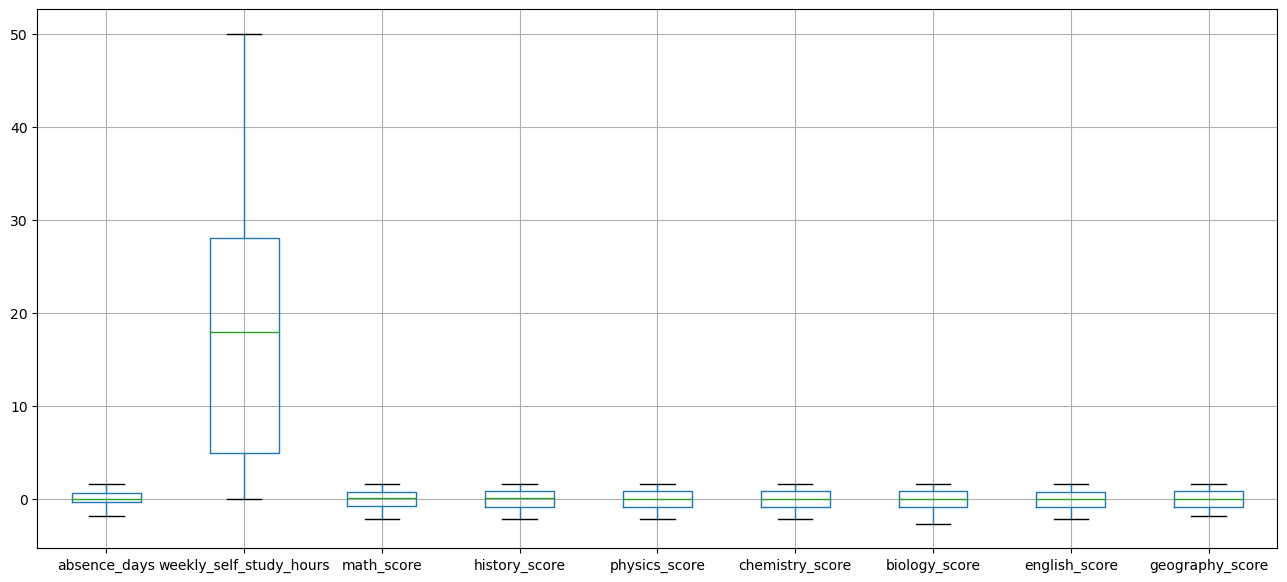

In [52]:
# box plot on neumerical features 

plt.figure(figsize=(16,7))
df[['absence_days', 'weekly_self_study_hours', 'math_score', 'history_score', 'physics_score','chemistry_score', 'biology_score', 'english_score', 'geography_score']].boxplot()
plt.show()

In [53]:
df=df.drop(columns='id',axis=0)

In [54]:
# Train test Split and Sanderdization

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'weekly_self_study_hours', axis=1)
Y = df['weekly_self_study_hours']

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)    ## random state controll the suffling of data so mention it carefully it often effect the accuracy score or r2 score of the model
X_train

,part_time_job,absence_days,extracurricular_activities,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,...,career_aspiration_Game Developer,career_aspiration_Government Officer,career_aspiration_Lawyer,career_aspiration_Real Estate Developer,career_aspiration_Scientist,career_aspiration_Software Engineer,career_aspiration_Stock Investor,career_aspiration_Teacher,career_aspiration_Unknown,career_aspiration_Writer
333,-0.433184,0.036849,-0.506242,-1.221538,1.553545,-0.346573,0.361168,1.476439,0.317490,-0.685618,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,5.735704,-0.354249,-0.127515
721,-0.433184,-0.356254,-0.506242,1.637343,0.574155,1.422798,0.774295,1.015537,1.222415,1.485882,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,2.822873,-0.127515
1352,-0.433184,-0.356254,-0.506242,-1.699516,-0.005118,1.622035,1.372053,-0.503305,0.704019,0.517664,...,-0.180346,-0.177368,-0.272239,4.805870,-0.141024,-0.432370,-0.194635,-0.174347,-0.354249,-0.127515
1680,-0.433184,-0.900845,-0.506242,-0.077346,1.369293,1.131548,1.372053,1.476439,0.133463,1.131635,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,-0.354249,-0.127515
156,-0.433184,-1.833150,-0.506242,-1.373366,1.553545,0.226607,0.774295,-0.360676,-1.382609,1.219970,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,2.822873,-0.127515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,-0.433184,0.628344,-0.506242,-1.589760,1.098035,0.399488,-0.505242,0.926430,-0.300137,1.397095,...,-0.180346,5.637986,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,-0.354249,-0.127515
1608,-0.433184,0.036849,-0.506242,0.523738,-0.915917,-0.025118,0.525008,1.667983,1.010309,1.663899,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,2.312835,-0.194635,-0.174347,-0.354249,-0.127515
493,-0.433184,0.355556,-0.506242,0.634409,1.461079,1.521909,0.442852,1.667983,0.317490,0.517664,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,-0.354249,-0.127515
527,-0.433184,0.036849,-0.506242,-1.928301,-1.841600,1.227617,-0.656257,-1.657992,-2.116683,-1.439850,...,-0.180346,-0.177368,-0.272239,-0.208079,-0.141024,-0.432370,-0.194635,-0.174347,-0.354249,-0.127515


In [56]:
X_train.columns

Index(['part_time_job', 'absence_days', 'extracurricular_activities',
       'math_score', 'history_score', 'physics_score', 'chemistry_score',
       'biology_score', 'english_score', 'geography_score', 'gender',
       'career_aspiration_Artist', 'career_aspiration_Banker',
       'career_aspiration_Business Owner',
       'career_aspiration_Construction Engineer', 'career_aspiration_Designer',
       'career_aspiration_Doctor', 'career_aspiration_Game Developer',
       'career_aspiration_Government Officer', 'career_aspiration_Lawyer',
       'career_aspiration_Real Estate Developer',
       'career_aspiration_Scientist', 'career_aspiration_Software Engineer',
       'career_aspiration_Stock Investor', 'career_aspiration_Teacher',
       'career_aspiration_Unknown', 'career_aspiration_Writer'],
      dtype='object')

In [57]:
Y_train

333      8.0
721     35.0
1352     9.0
1680    33.0
156     17.0
        ... 
1558    15.0
1608    24.0
493     46.0
527      1.0
1192    21.0
Name: weekly_self_study_hours, Length: 1600, dtype: float64

In [58]:
# standardize the train data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
print(X_train_standardized)

[[ 0.         -0.02266004  0.         ...  5.81228085 -0.35714789
  -0.13101394]
 [ 0.         -0.47495743  0.         ... -0.1720495   2.79996054
  -0.13101394]
 [ 0.         -0.47495743  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 ...
 [ 0.          0.34403864  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.         -0.02266004  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.          1.18540684  0.         ... -0.1720495  -0.35714789
  -0.13101394]]


In [59]:
# standardize the train data
X_test_standardized = scaler.transform(X_test)
print(X_test_standardized)

[[ 0.         -1.10155558  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.          0.65790424  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.         -0.02266004  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 ...
 [ 0.          0.93521463  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.         -0.02266004  0.         ... -0.1720495  -0.35714789
  -0.13101394]
 [ 0.          0.65790424  0.         ... -0.1720495  -0.35714789
  -0.13101394]]


## Model Evaluation

In [60]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVM Regressor": SVR()
}
model_list = []
r2_list =[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) 

    # Make predictions
    Y_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: ",model_test_rmse)
    print("- Mean Absolute Error: ",model_test_mae)
    print("- R2 Score: " ,model_test_r2)
    r2_list.append(model_test_r2)
    
    print('----------------------------------')
    
    print('\n')


Linear Regression
Model performance for Test set
- Root Mean Squared Error:  6.227029494287562
- Mean Absolute Error:  4.88781005859375
- R2 Score:  0.7240992158072219
----------------------------------


Lasso
Model performance for Test set
- Root Mean Squared Error:  6.969207506478745
- Mean Absolute Error:  5.684568814575397
- R2 Score:  0.6544126151633438
----------------------------------


Ridge
Model performance for Test set
- Root Mean Squared Error:  6.226175308716675
- Mean Absolute Error:  4.8870233363452735
- R2 Score:  0.7241749033578133
----------------------------------


K-Neighbors Regressor
Model performance for Test set
- Root Mean Squared Error:  6.771417872203723
- Mean Absolute Error:  5.0055000000000005
- R2 Score:  0.6737501503099765
----------------------------------


Decision Tree
Model performance for Test set
- Root Mean Squared Error:  8.400446416709055
- Mean Absolute Error:  5.8175
- R2 Score:  0.4978935257490774
----------------------------------


Rand

In [63]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.758221
2,Ridge,0.724175
0,Linear Regression,0.724099
8,SVM Regressor,0.718571
6,XGBRegressor,0.679570
3,K-Neighbors Regressor,0.673750
1,Lasso,0.654413
7,AdaBoost Regressor,0.544015
4,Decision Tree,0.497894


## Model Creation (Random Forest)

In [64]:
regression=RandomForestRegressor()
regression.fit(X_train,Y_train)

RandomForestRegressor()

In [65]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(validation_score)

-39.0590825

In [66]:
## Prediction for test data
Y_pred=regression.predict(X_test)
Y_pred

array([15.91, 18.42,  8.47,  2.93, 11.04, 22.47,  3.01, 17.21, 22.66,
       20.81, 14.31, 21.17, 28.75, 20.4 , 26.98, 24.4 , 22.21, 20.85,
       18.52, 22.35, 16.7 , 24.14,  2.07, 31.99,  4.18,  8.09, 20.91,
       31.37, 17.73, 21.29, 20.2 , 17.75, 19.92, 17.13, 15.04, 22.71,
       21.67, 22.56, 28.92, 29.67, 29.16, 17.94, 40.03, 23.39,  2.72,
       21.39, 21.29, 30.17, 26.31, 31.09, 23.8 , 14.97, 22.33, 25.33,
       21.8 , 30.55, 29.3 , 19.49,  1.64, 22.14,  8.34, 18.93,  6.66,
       21.63, 14.58, 24.22,  3.05,  2.65, 21.59, 23.78, 21.43,  3.19,
       20.17,  2.9 , 23.17, 34.26, 14.17, 19.45, 23.51, 41.82, 22.44,
       21.51, 17.46, 33.64,  9.23, 24.39, 23.93, 16.82, 23.18,  3.34,
       29.37, 30.23, 29.2 , 20.52, 30.32, 30.  , 16.79,  4.39, 22.92,
       17.97, 24.81, 23.06, 17.68, 17.94, 20.36, 10.94, 22.19, 18.4 ,
       31.21, 22.54, 22.69,  2.67,  2.1 ,  2.67,  4.61, 21.92, 43.07,
       23.01, 29.9 ,  5.76, 22.1 , 32.3 , 26.  ,  5.53, 23.36,  1.84,
       15.23, 23.9 ,

## Accurecy Check

In [67]:
# display R2 score

from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.7500042976201573


In [68]:
## Display Performance Metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

35.135121
4.52565
5.927488591300704


In [69]:
## on which parameters the model has been trained
regression.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

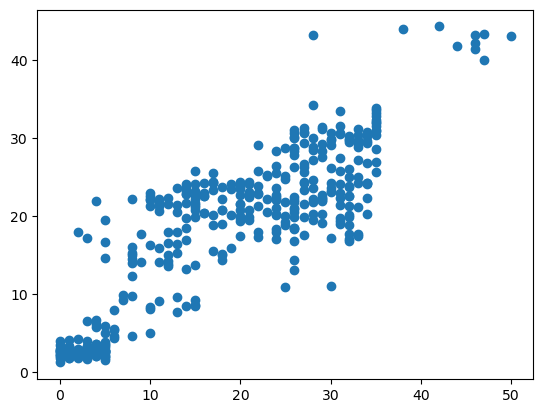

In [70]:
## plot a scatter plot for the prediction
plt.scatter(Y_test,Y_pred)

## Prediction on a given input data

In [71]:
# give input data as of the feature and corrospponding data
      # 'part_time_job', 'absence_days', 'extracurricular_activities',
      # 'math_score', 'history_score', 'physics_score', 'chemistry_score',
      # 'biology_score', 'english_score', 'geography_score', 'gender',
      # 'career_aspiration_Artist', 'career_aspiration_Banker',
      # 'career_aspiration_Business Owner',
      # 'career_aspiration_Construction Engineer', 'career_aspiration_Designer',
      # 'career_aspiration_Doctor', 'career_aspiration_Game Developer',
      # 'career_aspiration_Government Officer', 'career_aspiration_Lawyer',
      # 'career_aspiration_Real Estate Developer',
      # 'career_aspiration_Scientist', 'career_aspiration_Software Engineer',
      # 'career_aspiration_Stock Investor', 'career_aspiration_Teacher',
      # 'career_aspiration_Unknown', 'career_aspiration_Writer'
import warnings
warnings.filterwarnings('ignore')
        
input_data = (0,6,1,75,86,78,90,89,98,94,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

# predict the AQI value by the particular data
y_predict = regression.predict(std_data)
print(y_predict)

[30.02]


## Pickling  model  for deployment

In [72]:
import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [73]:
## Prediction
pickled_model.predict(scaler.transform(np.asarray((0,6,1,75,86,78,90,89,98,94,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0)).reshape(1,-1)))

array([30.02])